In [23]:
%reload_ext autoreload
%autoreload 2

In [24]:
import torch
from torch import nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from pathlib import Path

In [25]:
import interpret
from interpret import datasets
from interpret import *

In [26]:
ds = datasets.DiabeticRetData(DataType.Train)

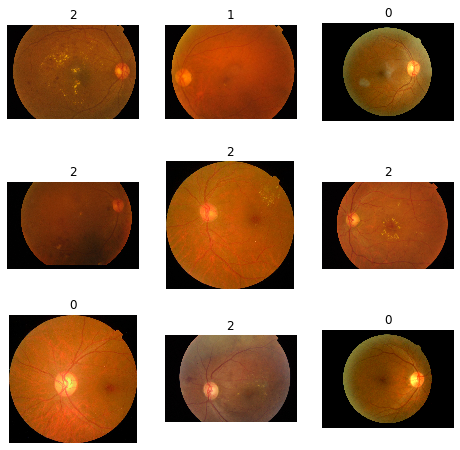

In [27]:
ds.show(9, random=True)

## Train a Classifier

In [34]:
model = torchvision.models.resnet34(pretrained=True)

In [35]:
tfms = interpret.get_transforms(64, rotate=360, flip_hor=True, perspective=False, 
                                color_jitter=False, translate=(0.1,0.1), zoom=(0.9,1.2), shear=None)

In [36]:
ds = datasets.DiabeticRetData(DataType.Train, tfms=tfms)
dl = DataLoader(ds, batch_size=128, num_workers=4, pin_memory=False)
l = Learner(dl, model)

In [37]:
# zoom(denorm(ds[np.random.randint(len(ds))][0]), 2)

In [38]:
%%time
l.fit(10, 1e-3)

0 - loss: 2.515  accuracy: 0.583
1 - loss: 0.892  accuracy: 0.698
2 - loss: 0.783  accuracy: 0.717
3 - loss: 0.759  accuracy: 0.727
4 - loss: 0.72  accuracy: 0.738
5 - loss: 0.725  accuracy: 0.742
6 - loss: 0.717  accuracy: 0.742
7 - loss: 0.714  accuracy: 0.746
8 - loss: 0.671  accuracy: 0.755
9 - loss: 0.646  accuracy: 0.772
CPU times: user 32.7 s, sys: 12.9 s, total: 45.7 s
Wall time: 26min 56s


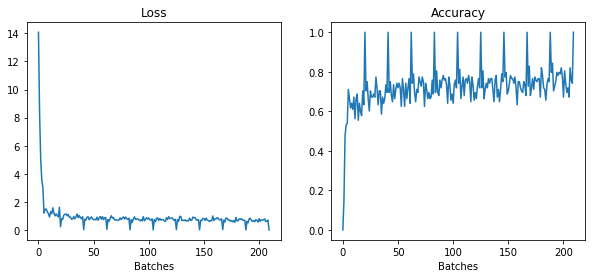

In [39]:
l.plot(smooth=False)

In [61]:
l.fit(5, 1e-4)

0 - loss: 0.588  accuracy: 0.786
1 - loss: 0.574  accuracy: 0.788
2 - loss: 0.56  accuracy: 0.792
3 - loss: 0.561  accuracy: 0.792
4 - loss: 0.551  accuracy: 0.793


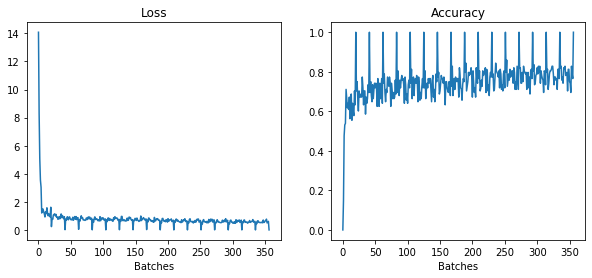

In [62]:
l.plot(smooth=False)

In [63]:
l.save('res34-2')

In [43]:
l.load('res34-2')

## Interpret

### GradCAM

In [44]:
im, lb = ds[5]
print(f"Image Label: {lb} - {ds.decode_label(lb)}")

Image Label: 2 - Moderate


In [49]:
model.eval()
im = im.to(torch.device('cuda'))
model.cuda()
preds = model(im[None]).argmax(1)
print(f"Prediction: {preds.item()} - {ds.decode_label(preds.item())}")

Prediction: 2 - Moderate


In [55]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

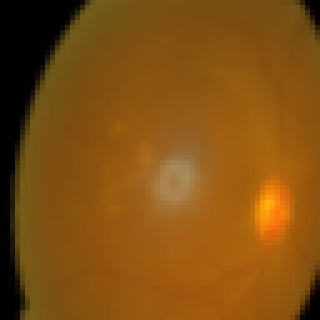

In [50]:
zoom(denorm(im),5)

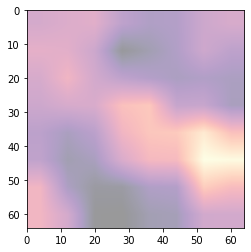

In [60]:
interpret.gradcam(model, im[None], im_class=2, layer='layer2/0/conv2', show_im=False);

### Visualisations